In [17]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib
import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
matplotlib.style.use('ggplot')

pd.set_option('precision',8)

def dateparse(time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
# Load dataset
ts = pd.read_csv('../../bld/out/data_raw/BTC_POT_chart_data.csv', parse_dates=True, index_col='date', date_parser=dateparse)

# Remove duplicated rows
dataframe = ts[~ ts.index.duplicated()]

dataframe = dataframe.iloc[1:2000,:]

dataframe



,close,high,low,open,quoteVolume,volume,weightedAverage
date,,,,,,,
2014-07-15 01:05:00,0.00001690,0.00001690,0.00001686,0.00001686,1000.00000000,0.01688000,0.00001688
2014-07-15 01:10:00,0.00001690,0.00001690,0.00001690,0.00001690,0.00000000,0.00000000,0.00001690
2014-07-15 01:15:00,0.00001690,0.00001690,0.00001690,0.00001690,0.00000000,0.00000000,0.00001690
2014-07-15 01:20:00,0.00001690,0.00001690,0.00001690,0.00001690,0.00000000,0.00000000,0.00001690
2014-07-15 01:25:00,0.00001690,0.00001690,0.00001690,0.00001690,0.00000000,0.00000000,0.00001690
2014-07-15 01:30:00,0.00001690,0.00001690,0.00001690,0.00001690,0.00000000,0.00000000,0.00001690
2014-07-15 01:35:00,0.00001690,0.00001690,0.00001690,0.00001690,0.00000000,0.00000000,0.00001690
2014-07-15 01:40:00,0.00001690,0.00001690,0.00001690,0.00001690,0.00000000,0.00000000,0.00001690
2014-07-15 01:45:00,0.00001690,0.00001690,0.00001690,0.00001690,0.00000000,0.00000000,0.00001690


In [19]:
dataset = dataframe.values
dataset = dataset.astype('float32')

1999

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

len(trainX)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [ ]:


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [8]:
trainPredict

array([[ 0.32976827],
       [ 0.32976827],
       [ 0.32976827],
       ..., 
       [ 0.16326725],
       [ 0.16326725],
       [ 0.16326725]], dtype=float32)

In [2]:
# create empty table with 12 fields
trainPredict_dataset_like = numpy.zeros(shape=(len(trainPredict), 7) )
# put the predicted values in the right field
trainPredict_dataset_like[:,0] = trainPredict[0]
# inverse transform and then select the right field
trainPredict = scaler.inverse_transform(trainPredict_dataset_like)[:,0]
trainX = scaler.inverse_transform(trainPredict_dataset_like)[:,1:]
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])

# create empty table with 12 fields
testPredict_dataset_like = numpy.zeros(shape=(len(testPredict), 7) )
# put the predicted values in the right field
testPredict_dataset_like[:,0] = testPredict[0]
# inverse transform and then select the right field
testPredict = scaler.inverse_transform(testPredict_dataset_like)[:,0]
testX = scaler.inverse_transform(testPredict_dataset_like)[:,1:]
#testY = scaler.inverse_transform([testY])

Train Score: 0.36 RMSE
Test Score: 0.14 RMSE


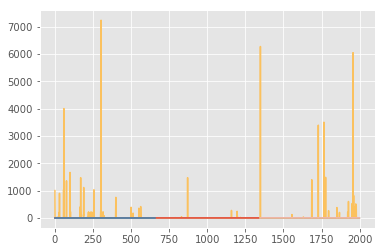

In [6]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [46]:
trainPredict_dataset_like[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.])